In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Creating features
x1 = [np.random.normal(0.5, 1) for x in range(1000)]
x2 = [(2 * x) + 1 for x in x1]
x3 = [math.sin(x) for x in x1]

In [3]:
# Adding label
y = [x + y + z for (x, y, z) in list(zip(x1, x2, x3))]

In [4]:
# Creating Dataframe
df = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "y": y})

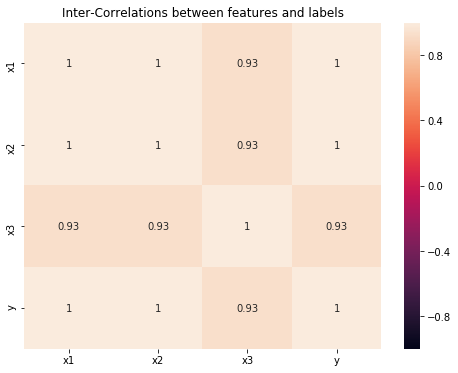

In [14]:
# Visualizing Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method="spearman"), annot=True, vmax=1, vmin=-1)
plt.title("Inter-Correlations between features and labels")
plt.show()

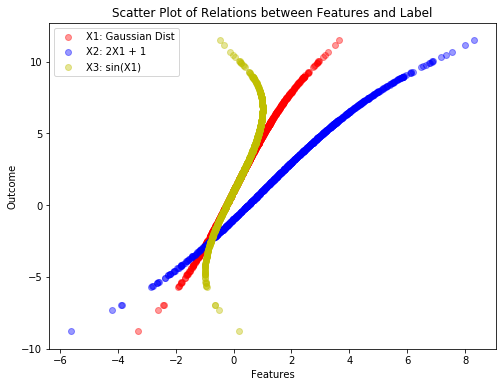

In [6]:
# Visualizing the relations between features and label
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, c="r", alpha=0.4, label="X1: Gaussian Dist")
plt.scatter(x2, y, c="b", alpha=0.4, label="X2: 2X1 + 1")
plt.scatter(x3, y, c="y", alpha=0.4, label="X3: sin(X1)")
plt.legend()
plt.title("Scatter Plot of Relations between Features and Label")
plt.xlabel("Features")
plt.ylabel("Outcome")
plt.show()

In [7]:
# Cleaning up
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
stdx = StandardScaler()
X = stdx.fit_transform(X)

In [8]:
# Building Model
est = RandomForestRegressor()
est.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

/Users/csingh/python_custom_env/base/lib/python3.7/site-packages/sklearn/inspection/_partial_dependence.py:715: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  FutureWarning)


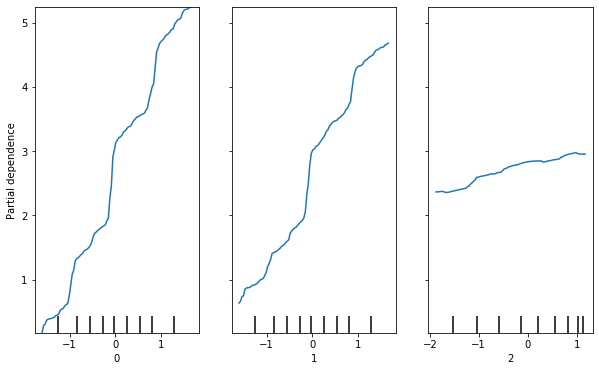

In [11]:
# Analyzing PDP plots
fig = plt.gcf()
fig.set_size_inches(10,6)
features = [0, 1, 2]
plot_partial_dependence(est, X, features, fig = fig)